### Ensemble_Method_I_Voting_Classifier


#### Importing Library

In [ ]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np

#### Generating dataset & plotting

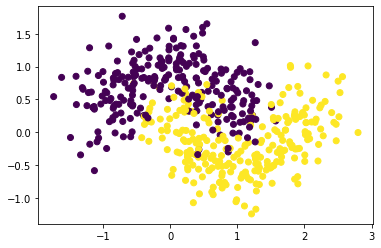

In [ ]:
X, y = sklearn.datasets.make_moons(500, noise=0.3,random_state=42) # check what happens,after changing noise = 0,.1,.2,.3
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

#### Spliting the data set into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Importing all the library for ensemble method and   using inside voting classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### Creating objects for individual classifier

In [ ]:
log_clf=LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf=RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf=SVC(gamma="scale", random_state=42)

#### Implementing Voting Classifier

In [ ]:
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

### Lets look at each classifier's Accuracy on the test set:

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


#### Displaying predicted values for individual predictor/esimator

In [ ]:
X_test

In [ ]:
## Votting classifier
voting_clf.fit(X_train,y_train)
y_pred=voting_clf.predict(X_test)
print(y_pred,'\n')
print('Acc: ',accuracy_score(y_test,y_pred))

[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 1 0 0 0] 

Acc:  0.912


In [ ]:
## Logistic classifier
log_clf.fit(X_train,y_train)
y_pred=log_clf.predict(X_test)
print(y_pred,'\n')
print('Acc: ',accuracy_score(y_test,y_pred))

[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1
 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 0] 

Acc:  0.864


In [ ]:
## Random forest classifier
rnd_clf.fit(X_train,y_train)
y_pred=rnd_clf.predict(X_test)
print(y_pred,'\n')
print('Acc: ',accuracy_score(y_test,y_pred))

[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 1 0 0 0] 

Acc:  0.896


In [ ]:
## Random forest classifier
svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)
print(y_pred,'\n')
print('Acc: ',accuracy_score(y_test,y_pred))

[0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1
 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0] 

Acc:  0.896
